# Weighted K-Means / Umut Gültekin 17401775

## Ağırlık Katsayısı İçermeyen Veri Seti

Okulların bulundukları kasabaların koordinatlarını içeren veri setini numpy array formatında döndürüyorum.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

def get_normal_data():
    df = pd.read_csv("prepared_dataset.csv")
    notnull = pd.notnull(df["Student Count"])
    
    arr = df[notnull].to_numpy()
    
    data = np.zeros(shape=(df["Student Count"].count(),2))
    i = 0
    for row in arr:
        data[i][0]=row[3]
        data[i][1]=row[4]
        i+=1
    return data

## Ağırlık Katsayısı İçeren Veri Seti

Okulların bulundukları kasabaların koordinatlarını ve öğrenci sayılarını katsayı olarak içeren veri setini numpy array formatında döndürüyorum.

In [2]:
def get_weighted_data():
    
    df = pd.read_csv("prepared_dataset.csv")
    notnull = pd.notnull(df["Student Count"])
    
    arr = df[notnull].to_numpy()
    
    data = np.zeros(shape=(df["Student Count"].count(),3))
    i = 0
    for row in arr:
        data[i][0]=row[3]
        data[i][1]=row[4]
        data[i][2]=row[5]
        i+=1
    return data

## Rastgele Nokta Üretici

Algoritmanın çıktı doğruluğunu kontrol edebilmek adına 3 merkez etrafında kümelenen rastgele noktalar oluşturdum, gerçek veri seti üzerinde çalışmadan önce bu noktalar ile kontrol ettim.

In [3]:
def random_data_generator():
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    data_1 = np.random.randn(200, 2) + center_1
    data_2 = np.random.randn(200,2) + center_2
    data_3 = np.random.randn(200,2) + center_3

    data = np.concatenate((data_1, data_2, data_3), axis = 0)
    
    plt.scatter(data[:,0], data[:,1], s=7)
    return data

## Rastgele Üretilen Noktalara Ağırlık Ekleyici

Gerçek veri seti üzerinde çalışmaya başlamadan önce test aşamasında üretilen noktaların ortalama değerlere yakın olanlarına fazladan ağırlık ekliyorum.

In [4]:
def add_weight(data):
    total_x = 0
    total_y = 0
    counter = 0
    for point in data:
        total_x += point[0]
        total_y += point[1]
        counter +=1
    mean_x = total_x/counter
    mean_y = total_y/counter
    
    weighted_data = np.zeros(shape=(len(data),3))
    i = 0
    for point in data:
        if distance(point[0],point[1],mean_x,mean_y)<3:
            weight = 100
        else:
            weight = 1
            
        weighted_data[i][0]=point[0]
        weighted_data[i][1]=point[1]
        weighted_data[i][2]=weight
        i+=1
        
    i = 0
    return weighted_data

## Rastgele Merkez Seçici

In [5]:
def get_random_centers(data):
    idx = np.random.randint(len(data), size=3)
    random_centers = data[idx,:]
    return random_centers

## Uzaklık Fonksiyonu

In [6]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

## Ağırlık Eklenmemiş K-Means Algoritması
Ağırlık eklenmiş algoritmaya normal K-means algoritmasını karşılaştırabilmek için ilk başta standart K-Means algoritmasından çıktılar elde etmem gerekiyor.

In [7]:
def regular_kmeans(data,cent1,cent2,cent3):
   
    cluster_dict = {}
    cluster_dict[cent1[0],cent1[1]]=[]
    cluster_dict[cent2[0],cent2[1]]=[]
    cluster_dict[cent3[0],cent3[1]]=[]
    
    for j in range(20):
        for point in data:
            res = []
            for centers in cluster_dict:
                cx = centers[0]
                cy = centers[1]
                temp=[centers,distance(cx,cy,point[0],point[1])]
                res.append(temp)
            min_value = min(res, key = lambda t: t[1])
            temp = []
            temp.append(point[0])
            temp.append(point[1])
            cluster_dict[min_value[0]].append(temp)

        new_centers = []
        old_centers = []

        for center in cluster_dict:
            x_total = 0
            y_total = 0
            for point in cluster_dict[center]:
                x_total+=point[0]
                y_total+=point[1]
            mean_x = (x_total+center[0])/(len(cluster_dict[center])+1)
            mean_y = (y_total+center[1])/(len(cluster_dict[center])+1)

            temp = []
            temp.append(mean_x)
            temp.append(mean_y)
            new_centers.append(temp)

        for center in cluster_dict:
            old_centers.append(center)

        if j!=19:
            cluster_dict ={}
            for center in new_centers:
                cluster_dict[center[0],center[1]] = [] 
    return cluster_dict

## Ağırlık Eklenmiş K-Means Algoritması
Standart K-Means algoritmasından farklı olarak bu algoritmada yeni merkez belirkenirken noktaların x,y koordinatları haricinde  ağırlık katsayısını da hesaba dahil ediyorum.

In [8]:
def weighted_kmeans(weighted_data,cent1,cent2,cent3):
    cluster_dict = {}
    cluster_dict[cent1[0],cent1[1]]=[]
    cluster_dict[cent2[0],cent2[1]]=[]
    cluster_dict[cent3[0],cent3[1]]=[]
    
    for j in range(20):
        for point in weighted_data:
            res = []
            for centers in cluster_dict:
                cx = centers[0]
                cy = centers[1]
                temp=[centers,distance(cx,cy,point[0],point[1])]
                res.append(temp)
            min_value = min(res, key = lambda t: t[1])
            temp1 = []
            temp1.append(point[0])
            temp1.append(point[1])
            temp1.append(point[2])
            cluster_dict[min_value[0]].append(temp1)
        new_centers = []
        old_centers = []

        for center in cluster_dict:
            x_total = 0
            y_total = 0
            weight_x = 0
            weight_y = 0
            for point in cluster_dict[center]:
                weight_x+=point[2]
                weight_y+=point[2]
                x_total+=point[0]*point[2]
                y_total+=point[1]*point[2]
            mean_x = (x_total+center[0])/(weight_x)
            mean_y = (y_total+center[1])/(weight_y)
            
            temp = []
            temp.append(mean_x)
            temp.append(mean_y)
            new_centers.append(temp)
        for center in cluster_dict:
            old_centers.append(center)

        if j!=19:
            cluster_dict ={}
            for center in new_centers:
                cluster_dict[center[0],center[1]] = [] 

    return cluster_dict

## Kümelenmiş Noktaların Görselleştirilmesi

In [9]:
def plot_clusters(cluster_dict):
    min_x = 9999999999999
    max_x = -999999999999
    min_y = 999999999999999
    max_y = -99999999999999

    for center in cluster_dict:
        min_value_x = min(cluster_dict[center], key = lambda t: t[0])[0]
        max_value_x = max(cluster_dict[center], key = lambda t: t[0])[0]
        min_value_y = min(cluster_dict[center], key = lambda t: t[1])[1]
        max_value_y = max(cluster_dict[center], key = lambda t: t[1])[1]
        if min_value_x<min_x:
            min_x = min_value_x
        if max_value_x>max_x:
            max_x = max_value_x
        if min_value_y<min_y:
            min_y = min_value_y
        if max_value_y>max_y:
            max_y = max_value_y
        
    plot_size_y = 1
    plot_size_x = 1
    plt.xlim(min_x/plot_size_x, max_x*plot_size_x)
    plt.ylim(min_y/plot_size_y, max_y*plot_size_y)
    color = []
    for center in cluster_dict:
        name = "cluster "+str(center)
        color.append(name)
    counter = 0
    for center in cluster_dict:
        x_arr = []
        y_arr = []
        for point in cluster_dict[center]:
            x_arr.append(point[0])
            y_arr.append(point[1])
        plt.scatter(x_arr, y_arr, s=4)
        plt.scatter(center[0],center[1])
        counter+=1

# Main Fonksiyon

## Yazılan K-Means Algoritmalarının Test Edilmesi

### Test veri setinin elde edilmesi

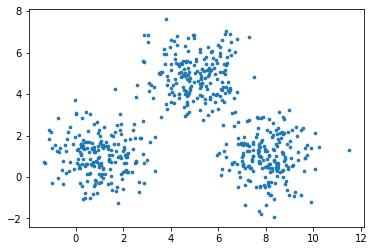

In [10]:
test_data = random_data_generator()

### Test veri setinin standart K-Means algoritmasına göre kümelendirilmesi

(5.031720824562311, 4.896834098296329)
(8.055541435739364, 0.9508258551046598)
(0.9758442518205304, 1.035758416778435)


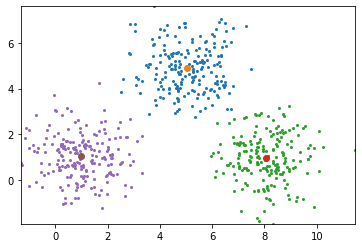

In [11]:
t_cent1,t_cent2,t_cent3 = get_random_centers(test_data)
test_cluster_dict = regular_kmeans(test_data,t_cent1,t_cent2,t_cent3)
for centers in test_cluster_dict:
    print(centers)
plot_clusters(test_cluster_dict)

### Test veri setinin Ağırlıklı K-Means algoritmasına göre kümelendirilmesi

(4.9567894798975445, 4.308790042323984)
(6.923784364347473, 1.3982526623716538)
(2.334781227645028, 1.641951211471864)


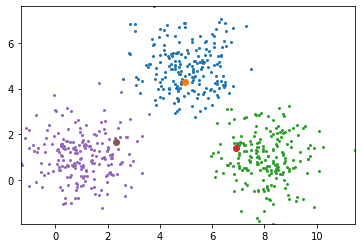

In [12]:
test_weighted_data= add_weight(test_data)
test_weighted_dict = weighted_kmeans(test_weighted_data,t_cent1,t_cent2,t_cent3)
for centers in test_weighted_dict:
    print(centers)
plot_clusters(test_weighted_dict)

Ağırlık ekleme işleminde merkeze yakın noktalara daha fazla ağırlık eklendiğinden dolayı, 
Ağırlıklı K-Means algoritmasından çıkan sonuçlarda küme merkezlerinin resmin ortasına kayması
gerekiyor. Bu durum test edildikten sonra gerçek veri seti üstünde algoritmaları test etmeye geçiyoruz.

## Yazılan K-Means Algoritmalarının Gerçek Veri Seti Üzerinde Çalıştırılması

### Veri setlerinin elde edilmesi & Merkezlerin belirlenmesi

In [13]:
data = get_normal_data()
weighted_data = get_weighted_data()
cent1,cent2,cent3 = get_random_centers(data)


### Standart K-Means algoritmasına ait cluster sonuçları (sözlük yapısında)

In [14]:
cluster_dict = regular_kmeans(data,cent1,cent2,cent3)
for center in cluster_dict:
    print("=============cluster center:({})===============".format(center))
    print(cluster_dict)
    print("===============================================")

=============cluster center:((42.388861223296566, -71.49273586661462))===============
{(42.388861223296566, -71.49273586661462): [[42.473131, -71.67946], [42.049864, -71.9173], [42.757767, -71.08518], [42.352996, -71.20907], [42.573592, -71.2911], [42.321917, -71.64692], [42.131028, -71.75121], [42.665686, -71.5929], [42.393029, -71.24771], [42.238942, -71.91908], [42.345833, -71.24735], [42.20361, -71.83843], [42.220447, -71.53418], [42.166398, -71.36178], [42.177462, -71.69382], [42.496679, -71.27504], [42.286643, -71.72502], [42.283995, -71.42161], [42.125536, -71.53662], [42.028147, -71.52999], [42.0597, -71.34617], [42.354727, -71.18809], [42.729437, -70.98291], [42.505928, -71.5888], [42.423882, -71.51086], [42.212949, -71.20735], [42.117527, -71.8657], [42.371296, -71.18196], [42.350909, -71.54753], [42.196065, -71.43797], [42.231444, -71.70523], [42.011848, -71.32392], [42.380562, -71.62665], [42.345583, -71.35643], [42.52585, -71.10993], [42.240526, -71.83776], [42.54805, -71.

### Standart K-Means algoritmasına ait görsel çıktı

(42.388861223296566, -71.49273586661462)
(42.32897780633696, -72.62380668854165)
(42.113528468209985, -70.87962684442196)


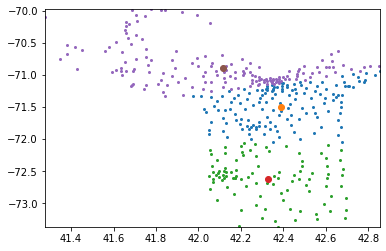

In [15]:
for centers in cluster_dict:
    print(centers)
plot_clusters(cluster_dict)

### Ağırlıklı K-Means algoritmasına cluster sonuçları (sözlük yapısında)

In [16]:
weighted_dict= weighted_kmeans(weighted_data,cent1,cent2,cent3)
for center in weighted_dict:
    print("=============cluster center:({})===============".format(center))
    print(cluster_dict)
    print("===============================================")

=============cluster center:((42.35650058187358, -71.60471830617871))===============
{(42.388861223296566, -71.49273586661462): [[42.473131, -71.67946], [42.049864, -71.9173], [42.757767, -71.08518], [42.352996, -71.20907], [42.573592, -71.2911], [42.321917, -71.64692], [42.131028, -71.75121], [42.665686, -71.5929], [42.393029, -71.24771], [42.238942, -71.91908], [42.345833, -71.24735], [42.20361, -71.83843], [42.220447, -71.53418], [42.166398, -71.36178], [42.177462, -71.69382], [42.496679, -71.27504], [42.286643, -71.72502], [42.283995, -71.42161], [42.125536, -71.53662], [42.028147, -71.52999], [42.0597, -71.34617], [42.354727, -71.18809], [42.729437, -70.98291], [42.505928, -71.5888], [42.423882, -71.51086], [42.212949, -71.20735], [42.117527, -71.8657], [42.371296, -71.18196], [42.350909, -71.54753], [42.196065, -71.43797], [42.231444, -71.70523], [42.011848, -71.32392], [42.380562, -71.62665], [42.345583, -71.35643], [42.52585, -71.10993], [42.240526, -71.83776], [42.54805, -71.2

### Ağırlıklı K-Means algoritmasına ait görsel çıktı

(42.35650058187358, -71.60471830617871)
(42.23957232415208, -72.63109368374808)
(42.25135009316467, -71.02162195923198)


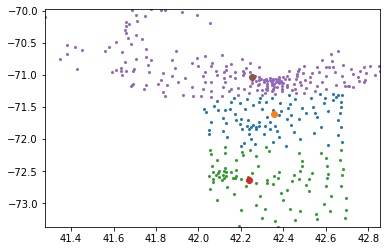

In [17]:
for centers in weighted_dict:
    print(centers)
plot_clusters(weighted_dict)